In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats

### FCFM
### MINERIA DE DATOS
### NANCY NOHEMI DAVILA JUAREZ - 1937883
### Class introduction

In [2]:
df1=pd.read_csv("C:\\Users\\nohem\\OneDrive\\Escritorio\\mineria\\Inflacion México.csv") 
df1

,Año,Porcentaje
0,1920,5.00
1,1921,-8.84
2,1922,-16.17
3,1923,7.42
4,1924,-4.42
...,...,...
96,2016,3.36
97,2017,6.77
98,2018,4.83
99,2019,2.83


### Data cleaning

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Año         101 non-null    int64  
 1   Porcentaje  101 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


### - No es necesario hacer limpieza, ya que los datos estan correctoy y ninguna celda esta vacia.

### Data Parsing

In [4]:
df1.shape

(101, 2)

In [5]:

df1.columns

Index(['Año', 'Porcentaje'], dtype='object')

In [6]:
df1.dtypes

Año             int64
Porcentaje    float64
dtype: object

### Mi base de datos trata sobre la Inflación de México, desde el año 1920 hasta el 2020, muestra los porcentajes del cambio en la inflación.

### Descriptive Statistics

In [7]:
df1.describe()

,Año,Porcentaje
count,101.000000,101.000000
mean,1970.000000,13.262376
std,29.300171,24.578549
min,1920.000000,-16.170000
25%,1945.000000,2.770000
50%,1970.000000,5.200000
75%,1995.000000,16.370000
max,2020.000000,159.170000



### Data Visualization

<AxesSubplot:xlabel='Año', ylabel='Porcentaje'>

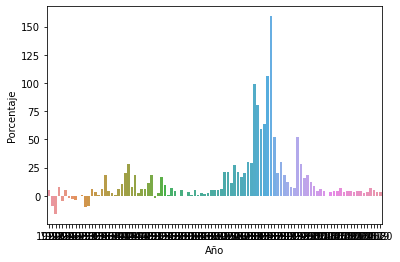

In [8]:
sns.barplot(x=df1['Año'], y=df1['Porcentaje'])

<AxesSubplot:xlabel='Año', ylabel='Porcentaje'>

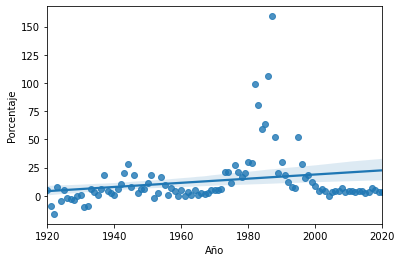

In [9]:
sns.regplot(x=df1['Año'],y=df1['Porcentaje'])

In [10]:
x=df1['Año'] 
y=df1[ 'Porcentaje']

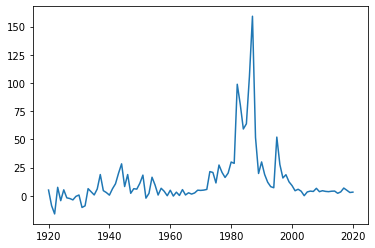

In [11]:
plt.plot(x,y)

### Statistic Test

In [12]:
import scipy.stats as stats

In [13]:
fvalue, pvalue = stats.f_oneway(df1['Año'], df1['Porcentaje'])
print(fvalue, pvalue)

264398.8032361685 3.937828304e-314


### Linear Models

In [14]:
filas=len(df1.index) #variable para contar las filas
filas

101

In [15]:
a = {'x':df1["Año"],'y':df1["Porcentaje"]}
b = pd.DataFrame(a)

In [16]:

from sklearn.linear_model import LinearRegression

In [17]:

Linea_Regresion = LinearRegression()

In [18]:

Eje_X = b[['x']] #ESTA ES LA NOTACION PARA LAS COLUMNAS
Eje_Y = b[['y']]

In [19]:
Linea_Regresion.fit(Eje_X,Eje_Y)

LinearRegression()

### El valor de beta 1


In [22]:

Linea_Regresion.coef_

array([[0.1844431]])

### El valor de beta 0

In [23]:
 
Linea_Regresion.intercept_

array([-350.09052766])

###### Entonces la  función de regresión lineal esta dada por la siguiente ecuación:
###### y = -350.09052 + 0.184443 x

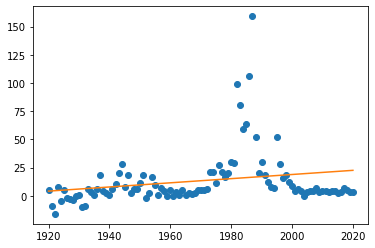

In [29]:
plt.plot(df1["Año"],df1["Porcentaje"],'o')
plt.plot([min(df1["Año"]),max(df1["Año"])],[-350.09052766+0.1844431 *min(df1["Año"]),-350.09052766+0.1844431*max(df1["Año"])])

### Forecasting

##### El forecasting es el proceso de hacer pronósticos del futuro sobre la base de datos pasados y presentes añadiendo como complemento el análisis de tendencias. El sector empresarial está rodeado por la demanda de los clientes y usuarios potenciales. Los patrones de la demanda tienden a variar considerablemente de un período a otro. Teniendo en cuenta las variaciones del consumidor, es muy difícil hacer predicciones y adelantarse a los acontecimientos.
##### El forecasting se utiliza a través de datos e información que tienen su origen en procesos anteriores o presentes. Mediante estos datos recogidos por la empresa, se escogerán los diferentes métodos y herramientas. Si tenemos en cuenta esto, la elaboración y ejecución del forecasting significa que los métodos o herramientas tradicionales o habituales no son efectivas para intuir o predecir lo necesario para la empresa. La necesidad de adelantarse a los acontecimientos puede suponer estar presente en el cambio de tendencias así como predecir futuros escenarios de productos o servicios.

In [30]:
a = {'Año(x)':df1["Año"],'Porcentaje(y)':df1["Porcentaje"]}
b = pd.DataFrame(a)
b

,Año(x),Porcentaje(y)
0,1920,5.00
1,1921,-8.84
2,1922,-16.17
3,1923,7.42
4,1924,-4.42
...,...,...
96,2016,3.36
97,2017,6.77
98,2018,4.83
99,2019,2.83


In [31]:
Linea_Regresion = LinearRegression()

Linea_Regresion.fit(b[['Año(x)']],b[['Porcentaje(y)']])

LinearRegression()

(0.0, 167.93699999999998)

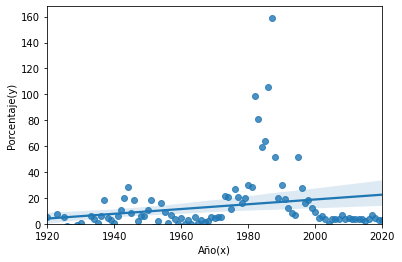

In [32]:
#ANALIZAMOS DE MANERA VISUAL

sns.regplot( x = 'Año(x)', y = 'Porcentaje(y)', data = b,ci = 95)
plt.ylim(0,)

### TIME SERIES ANALYSIS

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

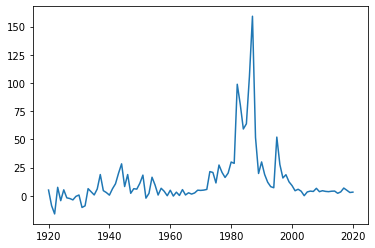

In [35]:
x=df1['Año'] 
y=df1[ 'Porcentaje']
plt.plot(x,y)

##### Podemos observar  que el porcentaje de la inflación es constante, por eso se espera que tenga el mismo comportamiento.

In [36]:
#1.Importamos la funcion 
from scipy import stats

#2.Mandamos a llamar la funcion pearsonr
Pearson = stats.pearsonr(b.loc[:,'Año(x)'], b.loc[:,'Porcentaje(y)'])


In [37]:
#3.IMPRIMIMOS EL COEFICIENTE DE PEARSON Y EL P-VALOR
print('El coeficiente de Pearson es ',Pearson[0],'\nEl P-Valor es ',Pearson[1])

El coeficiente de Pearson es  0.21987523271422613 
El P-Valor es  0.02715201422217646


In [38]:
#VERIFICAMOS lo QUE NOS DICE EL P-VALOR
if 0.01 < Pearson[1] and Pearson[1] < 0.05 :
  print('Fuerte certeza de relacion lineal')
elif 0.05 < Pearson[1] and Pearson[1] < 0.1 :
  print('Moderada certeza de relacion lineal')
elif Pearson[1] < 0.1:
  print('Debil certeza de relacion lineal')
elif Pearson[1] > 0.1:
  print('No existe certeza de relacion lineal')

Fuerte certeza de relacion lineal


R^2 Coeficiente de determinación
El coeficiente de determinación nos dice lo cerca que están los datos de la línea de regresión ajustada.

|R^2|Significado|

|Valor cercano a 1|La línea de regresión es un buen ajuste a los datos| |Valor cercano a 0|La línea de regresión no es un buen ajuste a los datos|

Sí el valor de $R^2$ es negativo puede deberse a un sobre ajuste de los datos.

Este coeficiente es aplicable a una regresión lineal, múltiple y polinómica, entre otras.

In [40]:
b
#1: IMPORTAMOS

from sklearn.linear_model import LinearRegression

LM = LinearRegression()

#2: AJUSTAMOS

LM.fit(b[['Año(x)']], b[['Porcentaje(y)']])

#3: CALCULAMOS EL COEFICIENTE DE DETERMINACION

print('El coeficiente de determinacion es ',LM.score(b[['Año(x)']], b[['Porcentaje(y)']]))

El coeficiente de determinacion es  0.04834511796113505


###### El coeficiente de determinación es la proporción de la varianza total de la variable explicada por la regresión. Es también denominado R cuadrado y sirve para reflejar la bondad del ajuste de un modelo a la variable que se pretende explicar.

###### El coeficiente de determinación puede adquirir resultados que oscilan entre 0 y 1. Así, cuando adquiere resultados más cercanos a 1, mayor resultará el ajuste del modelo a la variable que se pretende aplicar para el caso en concreto. Por el contrario, cuando adquiere resultados que se acercan al valor 0, menor será el ajuste del modelo a la variable que se pretende aplicar y, justo por eso, resultará dicho modelo menos fiable.

### Data classification

In [46]:
from pandas import DataFrame
e = {'x':df1["Año"],'y':df1["Porcentaje"]}
e_df= DataFrame(e,columns=['x','y'])
print(e_df)

        x      y
0    1920   5.00
1    1921  -8.84
2    1922 -16.17
3    1923   7.42
4    1924  -4.42
..    ...    ...
96   2016   3.36
97   2017   6.77
98   2018   4.83
99   2019   2.83
100  2020   3.15

[101 rows x 2 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

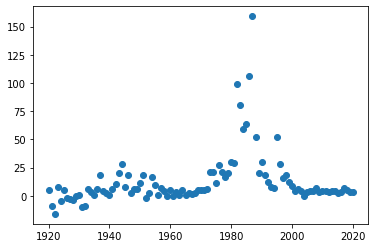

In [47]:
import matplotlib.pyplot as plt
plt.scatter(e_df['x'],e_df['y'])
plt.show

##### Podemos observar en la gráfica de dispersión, que los datos si estan dispersos y se puede decir que algunos no tienen relación entre si .


In [48]:
import sklearn

In [50]:
from sklearn.cluster import KMeans
KMeans = KMeans(n_clusters=3).fit(e_df)
centroids = KMeans.cluster_centers_
print(centroids)


[[1946.            4.06792453]
 [1998.55         11.3205    ]
 [1986.25         83.885     ]]


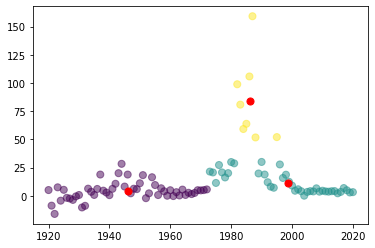

In [51]:
plt.scatter(e_df['x'],e_df['y'],c=KMeans.labels_.astype(float),s=50,alpha=0.5)
plt.scatter(centroids[:,0],centroids[:,1],c="red",s=50)
plt.show()

### Data clustering

In [52]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

NORMALIZAMOS los datos para que el agrupamiento no se valla parcializado a una sola variable.

In [56]:
from sklearn.preprocessing import normalize
data_e=normalize(e_df)


In [57]:
data_e= DataFrame(data_a,columns=['x','y'])
print(e_df)

        x      y
0    1920   5.00
1    1921  -8.84
2    1922 -16.17
3    1923   7.42
4    1924  -4.42
..    ...    ...
96   2016   3.36
97   2017   6.77
98   2018   4.83
99   2019   2.83
100  2020   3.15

[101 rows x 2 columns]


In [58]:
data_e=pd.DataFrame(data_e,columns=data_e.columns)
data_e.head()

,x,y
0,0.999997,0.002604
1,0.999989,-0.004602
2,0.999965,-0.008413
3,0.999993,0.003859
4,0.999997,-0.002297
